In [1]:
from scipy.optimize import curve_fit

from Triangulation import *
from Plots import *

C:\Users\matti\anaconda3\envs\2D_QG\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 3D Embedding

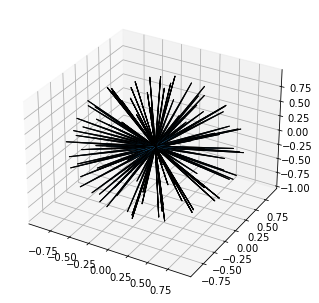

In [2]:
m = Manifold(200)
plot_triangulation_3d(m.adj)

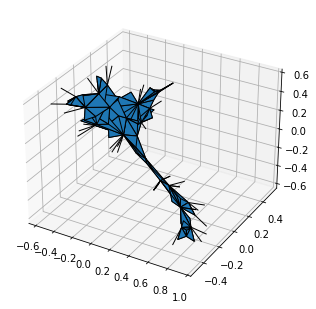

In [3]:
n_sweeps = 200
m.sweep(n_sweeps, 0.1, strategy=['ising', 'gravity'])
plot_triangulation_3d(m.adj)

In [4]:
is_sphere_triangulation(m.adj)

True

# Graph Representation

In [5]:
l2 = Manifold(4)
l2.sweep(1000)
adj = l2.adj
num_vert, vertex = vertex_list(adj)
edges = triangulation_edges(adj, vertex)
triangles = triangulation_triangles(adj, vertex)
G = nx.Graph(edges)

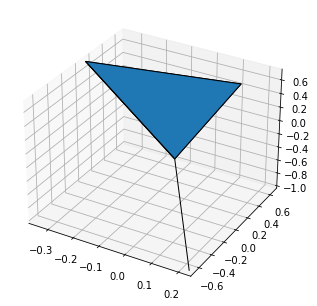

In [6]:
plot_triangulation_3d(l2.adj)

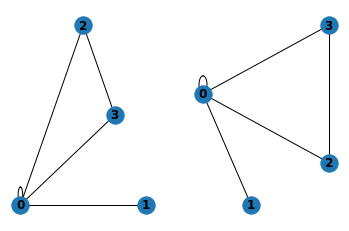

In [7]:
subax1 = plt.subplot(121)
nx.draw_planar(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

# Distance Profile and Haussdorff Dimension

In [8]:
sizes = np.array([2*int(i) for i in np.geomspace(20, 40, 2)])
eq_sweeps = 200
meas_sweeps = 2
n_measurements = 100
beta = 0

def make_profiles(beta, sizes, strategy=['gravity', 'ising'], eq_sweeps=eq_sweeps, n_measurements=n_measurements):
    mean_profiles = []
    for size in sizes:
        m = Manifold(size)
        m.sweep(eq_sweeps, beta=beta, strategy=strategy)
        profiles = []
        for _ in range(n_measurements):
            m.sweep(meas_sweeps, beta=beta, strategy=strategy)
            profiles.append(dist_prof(m.adj,15))
        mean_profiles.append([batch_estimate(data,np.mean,20) for data in np.transpose(profiles)])
    return np.array(mean_profiles)

def plot_profiles(mean_profiles):
    for profile in mean_profiles:
        plt.plot([y[0] for y in profile])
        plt.fill_between(range(len(profile)),[y[0]-y[1] for y in profile],[y[0]+y[1] for y in profile],alpha=0.2)
    plt.legend(sizes,title="N")
    plt.xlabel("r")
    plt.ylabel(r"$\mathbb{E}[\rho_T(r)]$")
    plt.title("Distance profile")
    plt.show()

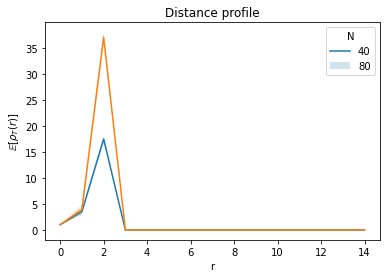

In [9]:
mean_profiles = make_profiles(beta, sizes)
plot_profiles(mean_profiles)

Example for $\beta = 0$

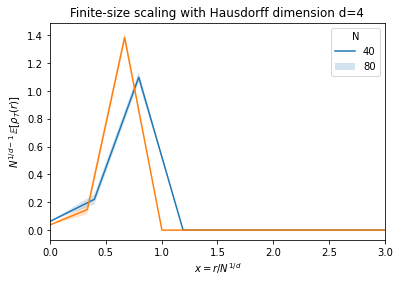

In [10]:
for i, profile in enumerate(mean_profiles):
    rvals = np.arange(len(profile))
    plt.plot(rvals/sizes[i]**0.25,[y[0]/ sizes[i]**0.75 for y in profile])
    plt.fill_between(rvals/sizes[i]**0.25,[(y[0]-y[1])/sizes[i]**0.75 for y in profile],
                     [(y[0]+y[1])/sizes[i]**0.75 for y in profile],alpha=0.2)
plt.legend(sizes,title="N")
plt.xlabel(r"$x = r / N^{1/d}$")
plt.ylabel(r"$N^{1/d-1}\,\mathbb{E}[\rho_T(r)]$")
plt.xlim(0,3)
plt.title("Finite-size scaling with Hausdorff dimension d=4")
plt.show()

# Finite size scaling

In [11]:
def profiles_max(profiles):
    profiles_max = np.max(profiles, axis=1)
    return profiles_max[:,0], profiles_max[:,1]

def power_fit(N, d, a):
    return a*N**d

def finite_size_scaling(beta, sizes, strategy=['gravity', 'ising'],):
    prof = make_profiles(beta, sizes, strategy=strategy)
    prof_max, sigma_max = profiles_max(prof)
    fit = curve_fit(power_fit, sizes, prof_max, p0=[0.75, 1])
    (d, a), err = fit
    d_H = 1/(1-d)
    d_err = np.sqrt(err[0,0])
    d_H_err = d_H**2*d_err
    a_err = np.sqrt(err[1,1])
    return prof, d_H, d_H_err, a, a_err

d_H = 5.223259830187503+/-d_H_err = 0.6763914625835425
a = 0.37401805441172015+/-a_err = 0.04300883369923094


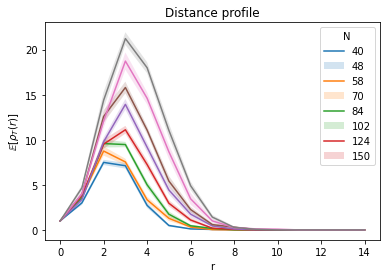

In [12]:
beta=0
sizes=sizes = [2*int(i) for i in np.geomspace(20, 75, 8)]

prof, d_H, d_H_err, a, a_err = finite_size_scaling(beta, sizes)

#print(f'{d = }' +'+/-'+ f'{d_err = }')
print(f'{d_H = }' +'+/-'+ f'{d_H_err = }')
print(f'{a = }'+'+/-'+ f'{a_err = }')

plot_profiles(prof)

d_H = 5.8917421799715175+/-d_H_err = 1.2534989394324325
a = 0.33425719057891884+/-a_err = 0.05605723216761476


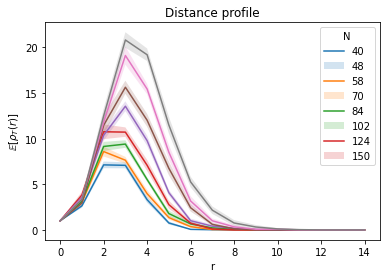

In [14]:
beta=0.2
sizes=sizes = [2*int(i) for i in np.geomspace(20, 75, 8)]

prof, d_H, d_H_err, a, a_err = finite_size_scaling(beta, sizes)

#print(f'{d = }' +'+/-'+ f'{d_err = }')
print(f'{d_H = }' +'+/-'+ f'{d_H_err = }')
print(f'{a = }'+'+/-'+ f'{a_err = }')

plot_profiles(prof)